# NETFLIX MOVIES AND TV SHOWS

Netflix is a popular service that people across the world use for entertainment. In this EDA, I will explore the netflix-shows dataset through visualizations and graphs using matplotlib and seaborn.

We will analyze this dataset to understand which contents are most present in the Netflix catalog and also to deepen the change in productivity in recent years.


### Install and Import libraries

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="Netflix EDA")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "monisharajak2001/netflix-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/monisharajak2001/netflix-eda


'https://jovian.ai/monisharajak2001/netflix-eda'

### Loading the Dataset

In [4]:
netflix_df = pd.read_csv('netflix_titles.csv')

In [5]:
netflix_df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
netflix_df.shape

(7787, 12)

### Data cleaning

Let us first find out how many missing data are there.


In [8]:
netflix_df.isna().sum()/len(netflix_df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

### Observations
1. #### 30.7% director -> so we will drop this column
2. #### 9.2% cast -> even this not important for our analysis so we will drop this column as well
3. #### 6.5% country -> this column also has lot of missing data but it is important so we will try to fill out this column
4. #### ~0.1% date added and rating -> in these two columns has very less data missing so we will try to fill this columns as well

In [9]:
netflix_df.drop("director",axis = 1,inplace = True)
netflix_df.drop("cast",axis=1,inplace = True)

Now let us fill the columns country,date added and rating with bfill method.

In [10]:
netflix_df['country'].fillna('Country unavailable',inplace = True)
netflix_df['date_added'].fillna('date unavailable',inplace = True)
netflix_df['rating'].fillna('bfill',inplace = True)

In [11]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

Next let's split the "duration" column in 2 arguments. The "duration_time" that contains the numerical part as an integer and the "unit" that contains if the numbers in the other column are minutes or seasons.

In [12]:
netflix_df[['duration_time','unit']] = netflix_df['duration'].str.split(' ',1,expand = True)
netflix_df['duration_time'] = netflix_df['duration_time'].astype(int)

In [13]:
netflix_df.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020          2020   
1      s2    Movie   7:19         Mexico  December 23, 2016          2016   
2      s3    Movie  23:59      Singapore  December 20, 2018          2011   
3      s4    Movie      9  United States  November 16, 2017          2009   
4      s5    Movie     21  United States    January 1, 2020          2008   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   
3  PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13    123 min                                             Dramas   

                                         description  duration_time     unit  
0  In a future where the elite inhabit an island ...              4  Seasons  
1  After a devastating earthquake hits Mexico Cit...             93      min  
2  When an army recruit is found dead, his fellow...             78      min  
3  In a postapocalyptic world, rag-doll robots hi...             80      min  
4  A brilliant group of students become card-coun...            123      min

In [14]:
jovian.commit(project="Netflix EDA")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "monisharajak2001/netflix-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/monisharajak2001/netflix-eda


'https://jovian.ai/monisharajak2001/netflix-eda'

### Splitting the Dataset

Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [15]:
netflix_movies_df = netflix_df[netflix_df["type"] == "Movie"].copy()
netflix_movies_df.head()

show_id   type  title        country         date_added  release_year  \
1      s2  Movie   7:19         Mexico  December 23, 2016          2016   
2      s3  Movie  23:59      Singapore  December 20, 2018          2011   
3      s4  Movie      9  United States  November 16, 2017          2009   
4      s5  Movie     21  United States    January 1, 2020          2008   
6      s7  Movie    122          Egypt       June 1, 2020          2019   

  rating duration                                          listed_in  \
1  TV-MA   93 min                       Dramas, International Movies   
2      R   78 min                Horror Movies, International Movies   
3  PG-13   80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13  123 min                                             Dramas   
6  TV-MA   95 min                Horror Movies, International Movies   

                                         description  duration_time unit  
1  After a devastating earthquake hits Mexico Cit...             93  min  
2  When an army recruit is found dead, his fellow...             78  min  
3  In a postapocalyptic world, rag-doll robots hi...             80  min  
4  A brilliant group of students become card-coun...            123  min  
6  After an awful accident, a couple admitted to ...             95  min

In [16]:
netflix_shows_df = netflix_df[netflix_df["type"] == "TV Show"].copy()
netflix_shows_df.head()

show_id     type   title                country         date_added  \
0       s1  TV Show      3%                 Brazil    August 14, 2020   
5       s6  TV Show      46                 Turkey       July 1, 2017   
11     s12  TV Show    1983  Poland, United States  November 30, 2018   
12     s13  TV Show    1994                 Mexico       May 17, 2019   
16     s17  TV Show  Feb-09    Country unavailable     March 20, 2019   

    release_year rating   duration  \
0           2020  TV-MA  4 Seasons   
5           2016  TV-MA   1 Season   
11          2018  TV-MA   1 Season   
12          2019  TV-MA   1 Season   
16          2018  TV-14   1 Season   

                                            listed_in  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
5     International TV Shows, TV Dramas, TV Mysteries   
11  Crime TV Shows, International TV Shows, TV Dramas   
12  Crime TV Shows, Docuseries, International TV S...   
16                  International TV Shows, TV Dramas   

                                          description  duration_time     unit  
0   In a future where the elite inhabit an island ...              4  Seasons  
5   A genetics professor experiments with a treatm...              1   Season  
11  In this dark alt-history thriller, a naïve law...              1   Season  
12  Archival video and new interviews examine Mexi...              1   Season  
16  As a psychology professor faces Alzheimer's, h...              1   Season

### Data IIlustration

Let's see if there are more movies or Tv shows 

Text(0.5, 1.0, 'TV Shows vs Movies')

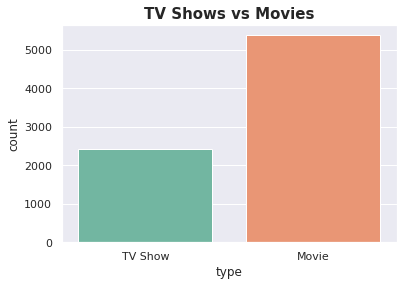

In [17]:
sns.set(style ="darkgrid")
ax = sns.countplot(x = "type",data = netflix_df, palette = 'Set2')
ax.set_title('TV Shows vs Movies', fontsize=15 , fontweight = 'bold')

As we can see, there are a large majority of films compared to TV shows.

In [18]:
jovian.commit(project = "Netflix EDA")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "monisharajak2001/netflix-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/monisharajak2001/netflix-eda


'https://jovian.ai/monisharajak2001/netflix-eda'

Let's see how many materials have been released in recent years.


Text(0.5, 1.0, 'New releases in the various years')

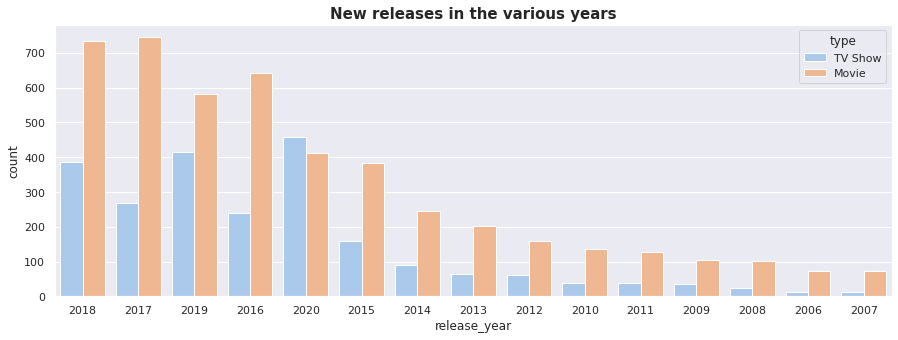

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x = "release_year", hue="type" , data = netflix_df ,order = netflix_df['release_year'].value_counts().index[0:15], palette = "pastel")
ax.set_title('New releases in the various years',fontsize = 15,fontweight = 'bold')

As the graph shows the most productive year was 2017 and 2018.

Now let's see which is the most productive country in the world.


Text(0.5, 1.0, 'Most productive countries')

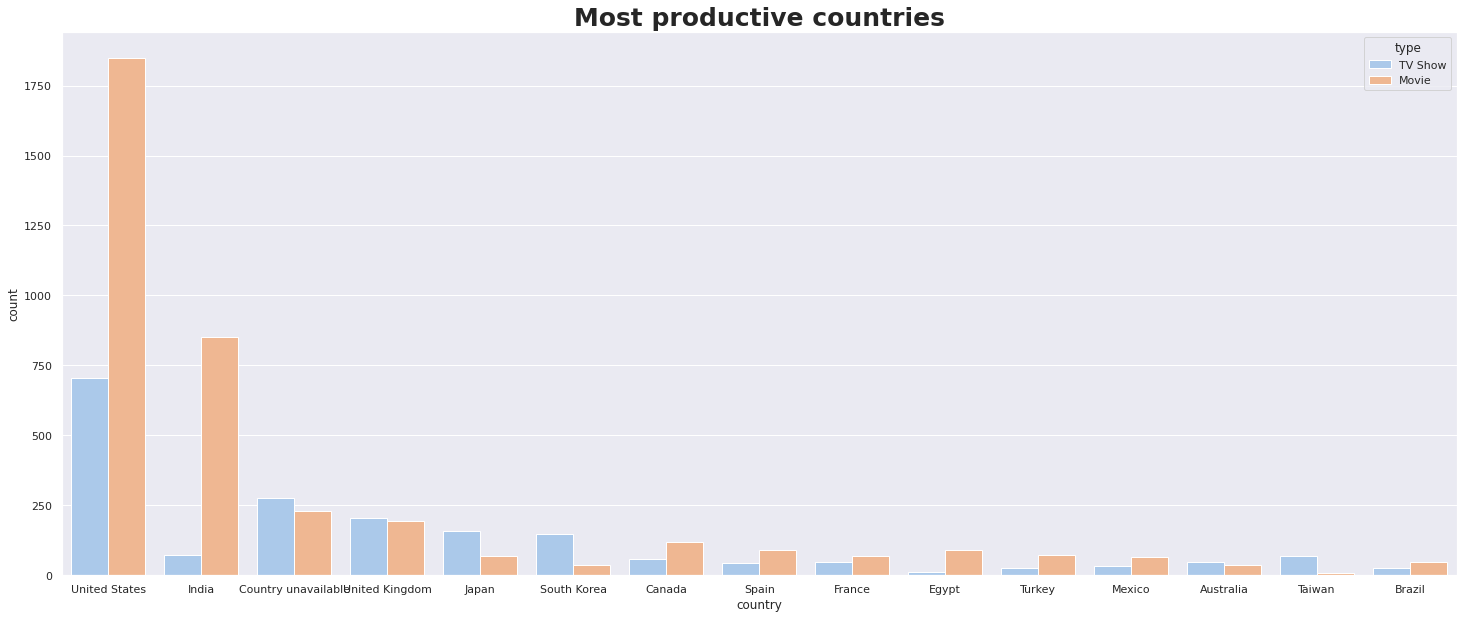

In [27]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x = "country", hue="type" , data = netflix_df ,order = netflix_df['country'].value_counts().index[0:15], palette = "pastel")
ax.set_title('Most productive countries',fontsize = 25,fontweight = 'bold')

Now we can see the most productive country is United states chased by India as expected.

#### Now let's see the ratings

First by categories

Text(0.5, 1.0, 'Ratings by categories')

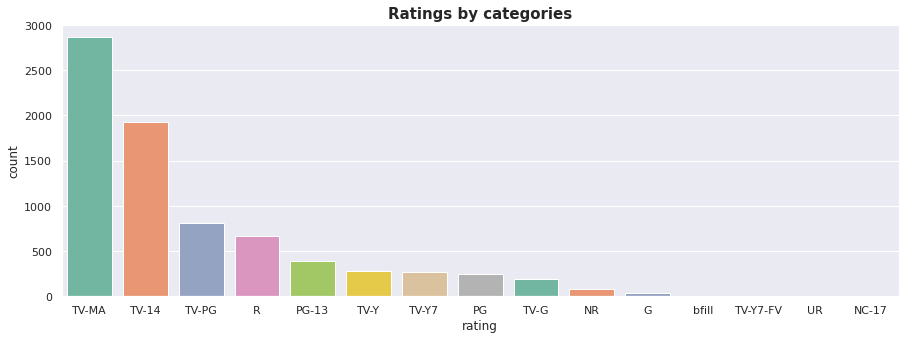

In [34]:
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_df, palette="Set2", order=netflix_df['rating'].value_counts().index[0:15])
ax.set_title('Ratings by categories', fontsize=15, fontweight='bold')

In [40]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'duration_time',
       'unit'],
      dtype='object')

Let's see how long on average do movies and TV shows last?

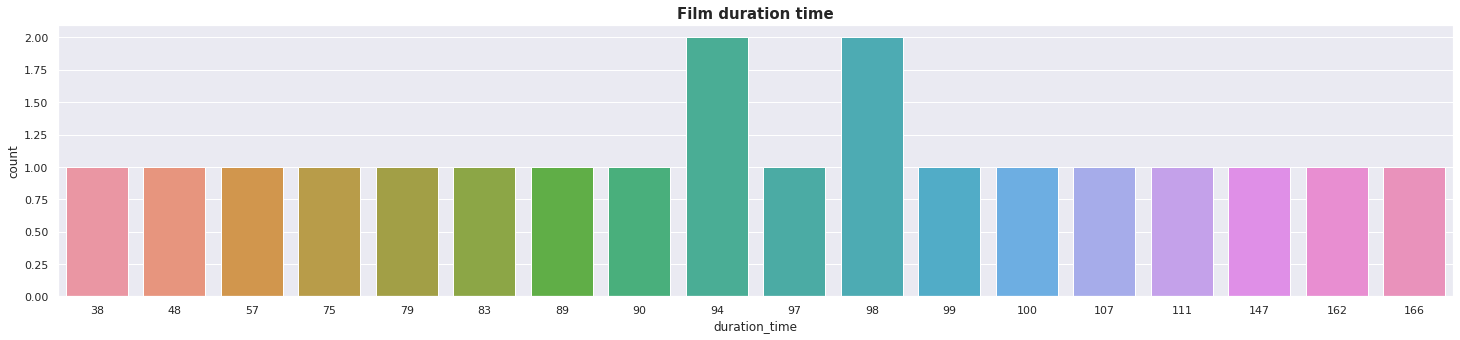

In [54]:
movies_df = netflix_movies_df.sample(n=20)
plt.figure(figsize=(25,5))
plt.title('Film duration time', fontsize=15, fontweight='bold')
ax = sns.countplot(x= "duration_time", data = movies_df)

In [ ]:
jovian.commit(project='Netflix EDA')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
